# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
import os

In [85]:
df_vehicles = pd.read_csv('data/vehicles.csv')
os.getcwd()

'/Users/vivekkumarsharma/Desktop/Machine_learning course/practical_application_II_starter'

# Key Drivers for used car prices ######

In [3]:
df_vehicles.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

The dataset contains important features like --- region, year, model and many more. The task is to find out the features responsible for the price of a used car. The price of a used car could be directly co-related or inversely co-related to some of the features mentioned in the dataset. As a data-science engineer, one has to clearly understand the features  directly impacting the price of a car and report the same to used-car dealership.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Setting the index of dataframe to the ID for the cars

Seeing the data-set, there are unique IDs for each used car sale price. Seeing that, we can set the index of teh dataframe to the Car IDs.

In [4]:
df_vehicles = df_vehicles.set_index('id')

1) Observing the corelation dataframe for the features, Looks like there are many features or columns which don't have numerical data and would need some treatment for data analysis. Seeing the correlation between price and other features, the price for used cars is inversely related to 'year' and directly related to 'odometer'

In [5]:
df_vehicles.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or


# Dropping NULL Values from Data-Frame

In [6]:
df_vehicles = df_vehicles.dropna()

# REMOVING OUTLIERS FROM DATA-FRAME

In [7]:
price_percentile25 = df_vehicles['price'].quantile(0.25)
price_percentile75 = df_vehicles['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25

In [8]:
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = df_vehicles['price'].quantile(0.15)

In [9]:
new_df_vehicles = df_vehicles[(df_vehicles['price'] < price_upper_limit) & (df_vehicles['price'] > price_lower_limit)]

In [10]:
odometer_percentile75 = df_vehicles['odometer'].quantile(0.75)
odometer_percentile25 = df_vehicles['odometer'].quantile(0.25)
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = df_vehicles['odometer'].quantile(0.05)

In [11]:
new_df_vehicles = new_df_vehicles[(new_df_vehicles['odometer'] < odometer_upper_limit) & (new_df_vehicles['odometer'] > odometer_lower_limit)]

In [12]:
new_df_vehicles.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
7315110575,birmingham,9400,2008.0,mercedes-benz,benz c350,good,6 cylinders,gas,129473.0,clean,automatic,WDDGF56X68F140907,rwd,full-size,sedan,silver,al
7314967754,birmingham,7300,2007.0,lexus,rx350,good,6 cylinders,gas,181000.0,clean,automatic,2T2GK31U57C025466,fwd,mid-size,SUV,white,al
7314956410,birmingham,28900,2017.0,audi,q7,good,6 cylinders,gas,94601.0,clean,automatic,WA1LAAF71HD007817,4wd,full-size,SUV,white,al


In [95]:
new_df_vehicles['manufacturer'].value_counts()

ford             5803
chevrolet        4078
toyota           2318
others           2100
honda            1532
nissan           1361
ram              1115
gmc              1107
jeep             1106
subaru            783
dodge             711
bmw               663
mercedes-benz     623
hyundai           608
volkswagen        602
lexus             495
kia               469
cadillac          413
chrysler          399
audi              364
mazda             319
Name: manufacturer, dtype: int64

# Cleaning up the dataframe for the features 'region', 'manufacturer' and 'model' for which the length is smaller 

In [14]:
manufacturer_values = new_df_vehicles['manufacturer'].value_counts()
new_df_vehicles['manufacturer'] = new_df_vehicles['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

In [15]:
region_values = new_df_vehicles['region'].value_counts()
new_df_vehicles['region'] = new_df_vehicles['region'].apply(lambda x: x if str(x) in region_values[:50] else 'others')

In [16]:
model_values = new_df_vehicles['model'].value_counts()
new_df_vehicles['model'] = new_df_vehicles['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

# Changing the 'year' and feature vector columns to integer data-type and cleaning from insignificant features vectors

In [17]:
new_df_vehicles['odometer'] = new_df_vehicles['odometer'].astype(int)

In [18]:
new_df_vehicles['car_age'] = 2023 - new_df_vehicles['year']
new_df_vehicles.drop(['year', 'VIN', 'state'], axis = 1, inplace = True)

# Plotting Correlation  for the price of a used car w.r.t other features

/tmp/ipykernel_29413/2530142771.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df_vehicles.corr(), annot=True)


<Axes: >

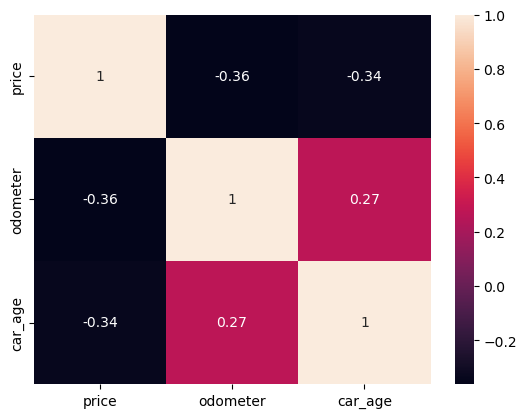

In [19]:
sns.heatmap(new_df_vehicles.corr(), annot=True)

The heatmap indicates clearly that the price of used car is inversely related to odometer reading and car age

# Price Distribution of car price

/tmp/ipykernel_29413/476995309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_vehicles['price'])


<Axes: xlabel='price', ylabel='Density'>

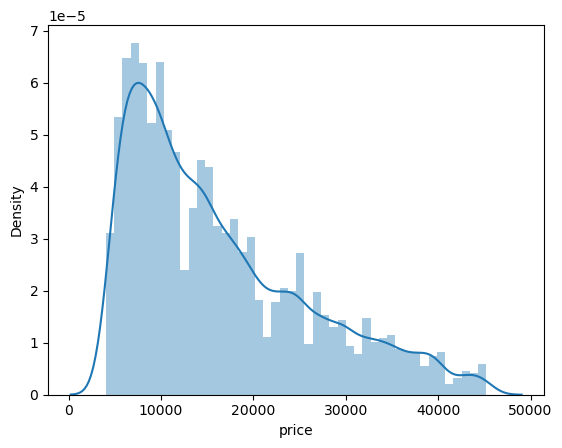

In [20]:
sns.distplot(new_df_vehicles['price'])

The price distribution indicates that, the mena price for the cars is somewhere around 10000

In [21]:
new_df_vehicles.head(5)

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,car_age
id,,,,,,,,,,,,,,,
7315946365,others,9000,mazda,others,excellent,4 cylinders,gas,56700,clean,automatic,rwd,compact,convertible,white,15.0
7315354216,others,8950,ford,f-150,excellent,6 cylinders,gas,164000,clean,automatic,fwd,full-size,truck,white,12.0
7315110575,others,9400,mercedes-benz,others,good,6 cylinders,gas,129473,clean,automatic,rwd,full-size,sedan,silver,15.0
7314967754,others,7300,lexus,others,good,6 cylinders,gas,181000,clean,automatic,fwd,mid-size,SUV,white,16.0
7314956410,others,28900,audi,others,good,6 cylinders,gas,94601,clean,automatic,4wd,full-size,SUV,white,6.0


In [22]:
new_df_vehicles['condition'].value_counts()

excellent    15591
good          8188
like new      2915
fair           180
new             80
salvage         15
Name: condition, dtype: int64

# Review of region where mean price is maximum

In [23]:
region_price = new_df_vehicles.groupby('region')[['price']].mean().reset_index()
region_price_sort = region_price.sort_values('price', ascending=False)
region_price_sort

,region,price
22,knoxville,25315.569697
1,anchorage / mat-su,23948.341463
16,grand rapids,23149.151316
28,nashville,21349.393189
45,treasure coast,21339.175141
0,albany,20139.029520
24,madison,19502.354839
15,ft myers / SW florida,19325.824176
49,vermont,18908.929487
50,wichita,18723.877778


So of all the regions 'northwest KS', 'northwest SD' and 'southwest VA' is having highest mean price for car.

# Maximum mean price  for 'manufacturer', 'condition', 'fuel' column

<Axes: xlabel='manufacturer', ylabel='price'>

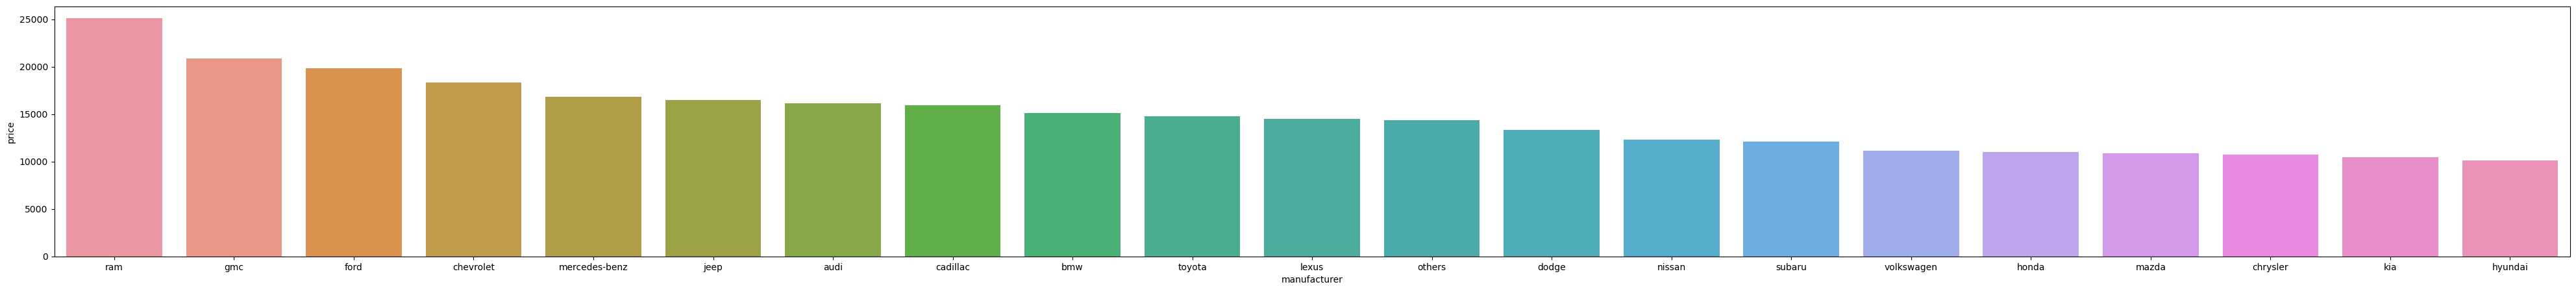

In [24]:
mf_price = new_df_vehicles.groupby('manufacturer')[['price']].mean().reset_index()
mf_price_sort = mf_price.sort_values('price', ascending=False)



fig,axs=plt.subplots()
fig.set_size_inches(50,5)
sns.barplot(x=mf_price_sort['manufacturer'], y=mf_price_sort['price'])

<Axes: xlabel='condition', ylabel='price'>

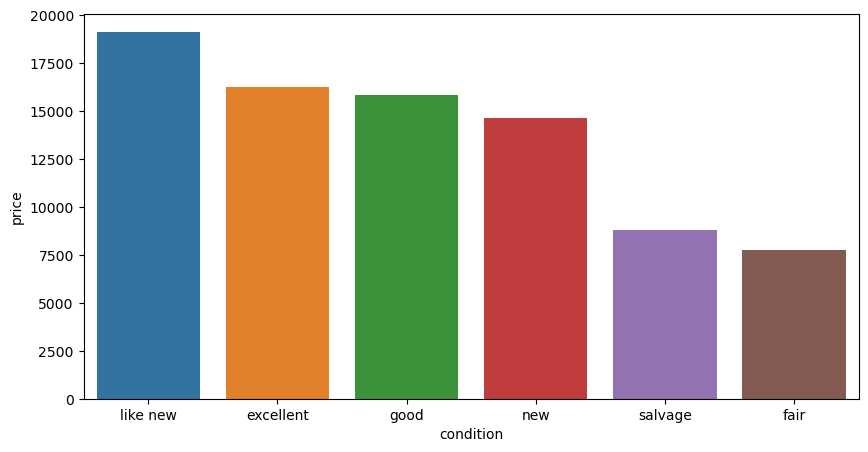

In [25]:
condition_price = new_df_vehicles.groupby('condition')[['price']].mean().reset_index()
condition_price_sort = condition_price.sort_values('price', ascending=False)



fig,axs=plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(x=condition_price_sort['condition'], y=condition_price_sort['price'])

<Axes: xlabel='fuel', ylabel='price'>

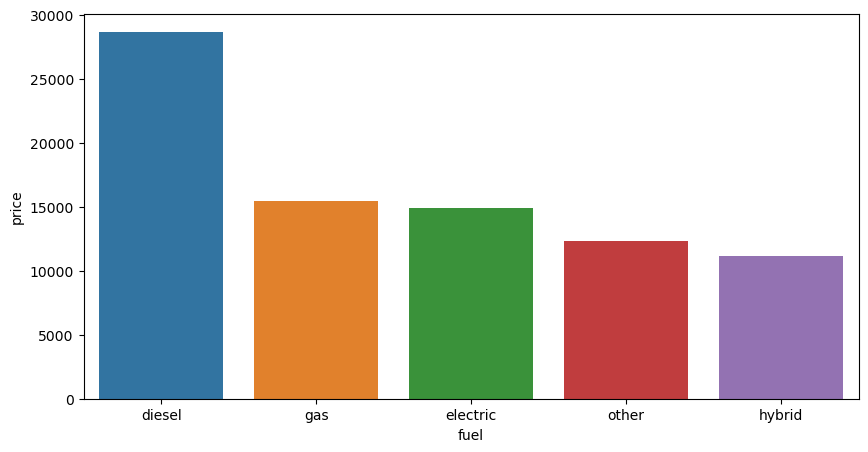

In [26]:
fuel_price = new_df_vehicles.groupby('fuel')[['price']].mean().reset_index()
fuel_price_sort = fuel_price.sort_values('price', ascending=False)



fig,axs=plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(x=fuel_price_sort['fuel'], y=fuel_price_sort['price'])

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [27]:
new_df_vehicles.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'car_age'],
      dtype='object')

In [28]:
final_df = new_df_vehicles.copy()
final_df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,car_age
id,,,,,,,,,,,,,,,
7315946365,others,9000,mazda,others,excellent,4 cylinders,gas,56700,clean,automatic,rwd,compact,convertible,white,15.0
7315354216,others,8950,ford,f-150,excellent,6 cylinders,gas,164000,clean,automatic,fwd,full-size,truck,white,12.0
7315110575,others,9400,mercedes-benz,others,good,6 cylinders,gas,129473,clean,automatic,rwd,full-size,sedan,silver,15.0
7314967754,others,7300,lexus,others,good,6 cylinders,gas,181000,clean,automatic,fwd,mid-size,SUV,white,16.0
7314956410,others,28900,audi,others,good,6 cylinders,gas,94601,clean,automatic,4wd,full-size,SUV,white,6.0


# Train-Test-split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['price'], axis = 1), final_df['price'], random_state = 42, test_size = .2, shuffle=True)

In [30]:
#len(np.unique(X_train['model'].values))
X_train['paint_color'].value_counts()

white     5966
black     3994
silver    3012
grey      2693
blue      2125
red       1885
custom     605
green      513
brown      511
yellow     150
orange      78
purple      43
Name: paint_color, dtype: int64

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [31]:
X_test['paint_color'].value_counts()

white     1521
black     1024
silver     729
grey       688
blue       526
red        456
custom     132
brown      131
green      112
orange      32
yellow      31
purple      12
Name: paint_color, dtype: int64

# Creating pipeline for encoder 

In [32]:
ohe_features = OneHotEncoder(sparse = False, drop = 'if_binary')
ode_condition = OrdinalEncoder(categories = [[ 'salvage', 'fair', 'good', 'excellent', 'like new', 'new']])
standard_scale_odometer = StandardScaler()
age_transform = PolynomialFeatures(degree=3, include_bias=False)

column_transformer = make_column_transformer(
                        (ohe_features, ['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']),
                        (ode_condition, ['condition']),
                        (standard_scale_odometer, ['odometer']),
                        remainder = 'passthrough'
)


poly_column_transformer = make_column_transformer(
                        (ohe_features, ['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']),
                        (ode_condition, ['condition']),
                        (standard_scale_odometer, ['odometer']),
                        (age_transform, ['car_age']),
                        remainder = 'passthrough'
)



In [33]:
MSE_TEST = {}

# LINEAR REGRESSION ON TRAINING DATASET

In [34]:
pipeline_encoder_linreg = Pipeline([
                            ('col_transform', column_transformer),
                            ('Linreg', LinearRegression())
])

In [35]:
pipeline_encoder_linreg.fit(X_train, y_train)

/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['region', 'manufacturer',
                                                   'model', 'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['odometer'])])),
                ('Linreg', LinearRegression())])

In [36]:
linreg_model = pipeline_encoder_linreg.named_steps['Linreg']
extracted_features = pipeline_encoder_linreg.named_steps['col_transform'].get_feature_names_out()
pd.DataFrame(linreg_model.coef_, index=extracted_features)

,0
onehotencoder__region_albany,-1.720673e+14
onehotencoder__region_anchorage / mat-su,-1.720673e+14
onehotencoder__region_asheville,-1.720673e+14
onehotencoder__region_boston,-1.720673e+14
onehotencoder__region_central NJ,-1.720673e+14
...,...
onehotencoder__paint_color_white,3.479689e+15
onehotencoder__paint_color_yellow,3.479689e+15
ordinalencoder__condition,8.689127e+02
standardscaler__odometer,-4.202930e+03


In [37]:
MSE_LINREG_TRAIN = mean_squared_error(pipeline_encoder_linreg.predict(X_train), y_train)
MSE_LINREG_TEST = mean_squared_error(pipeline_encoder_linreg.predict(X_test), y_test)
#MSE_LINREG_TTEST
MSE_TEST['LINREG'] = MSE_LINREG_TEST

In [38]:
poly_pipeline_encoder_linreg = Pipeline([
                            ('col_transform', poly_column_transformer),
                            ('Linreg', LinearRegression())
])

In [39]:
poly_pipeline_encoder_linreg.fit(X_train, y_train)

/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['region', 'manufacturer',
                                                   'model', 'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['odometer']),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False),
                                                  ['car_age'])])),
                ('Linreg', LinearRegression())])

In [40]:
poly_linreg_model = poly_pipeline_encoder_linreg.named_steps['Linreg']
poly_extracted_features = poly_pipeline_encoder_linreg.named_steps['col_transform'].get_feature_names_out()
pd.DataFrame(poly_linreg_model.coef_, index=poly_extracted_features)

,0
onehotencoder__region_albany,224.942752
onehotencoder__region_anchorage / mat-su,2663.952406
onehotencoder__region_asheville,414.278872
onehotencoder__region_boston,-1001.553511
onehotencoder__region_central NJ,-894.590523
...,...
ordinalencoder__condition,526.176740
standardscaler__odometer,-2753.905781
polynomialfeatures__car_age,-2214.807317
polynomialfeatures__car_age^2,53.641860


In [41]:
POLY_MSE_LINREG_TRAIN = mean_squared_error(poly_pipeline_encoder_linreg.predict(X_train), y_train)
POLY_MSE_LINREG_TEST = mean_squared_error(poly_pipeline_encoder_linreg.predict(X_test), y_test)
#POLY_MSE_LINREG_TEST
POLY_MSE_LINREG_TEST
MSE_TEST['POLY_LINREG'] = POLY_MSE_LINREG_TEST

# RIDGE REGRESSION ON TRAINING DATA SET

In [42]:
pipeline_encoder_ridge = Pipeline([
                            ('col_transform', column_transformer),
                            ('ridge', Ridge())
])

In [43]:
parameters_to_try_ridge = {'ridge__alpha': [20.336]}

In [44]:
ridge_model_finder = GridSearchCV(
                        estimator = pipeline_encoder_ridge,
                        param_grid = parameters_to_try_ridge
)

In [45]:
best_ridge_model = ridge_model_finder.fit(X_train, y_train)

/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sp

In [46]:
best_model_for_ridge = best_ridge_model.best_estimator_
alpha_value_for_ridge = best_ridge_model.best_params_
features_for_best_ridge_model = best_model_for_ridge.named_steps['col_transform'].get_feature_names_out()
coefs_for_best_ridge_model = best_model_for_ridge.named_steps['ridge'].coef_


pd.DataFrame(coefs_for_best_ridge_model, index=features_for_best_ridge_model)
alpha_value_for_ridge

{'ridge__alpha': 20.336}

In [47]:
MSE_RIDGE_TRAIN = mean_squared_error(best_model_for_ridge.predict(X_train), y_train)
MSE_RIDGE_TEST = mean_squared_error(best_model_for_ridge.predict(X_test), y_test)
MSE_RIDGE_TEST
MSE_TEST['RIDGE'] = MSE_RIDGE_TEST

In [48]:
poly_pipeline_encoder_ridge = Pipeline([
                            ('col_transform', poly_column_transformer),
                            ('ridge', Ridge())
])

In [49]:
poly_ridge_model_finder = GridSearchCV(
                        estimator = poly_pipeline_encoder_ridge,
                        param_grid = parameters_to_try_ridge
)

In [50]:
poly_best_ridge_model = poly_ridge_model_finder.fit(X_train, y_train)

/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sp

In [51]:
poly_best_model_for_ridge = poly_best_ridge_model.best_estimator_
alpha_value_for_poly_ridge = poly_best_ridge_model.best_params_
features_for_best_poly_ridge_model = poly_best_model_for_ridge.named_steps['col_transform'].get_feature_names_out()
coefs_for_best_poly_ridge_model = poly_best_model_for_ridge.named_steps['ridge'].coef_


pd.DataFrame(coefs_for_best_poly_ridge_model, index=features_for_best_poly_ridge_model)
alpha_value_for_poly_ridge

{'ridge__alpha': 20.336}

In [52]:
MSE_POLY_RIDGE_TRAIN = mean_squared_error(poly_best_model_for_ridge.predict(X_train), y_train)
MSE_POLY_RIDGE_TEST = mean_squared_error(poly_best_model_for_ridge.predict(X_test), y_test)
MSE_POLY_RIDGE_TEST
MSE_TEST['POLY_RIDGE'] = MSE_POLY_RIDGE_TEST

# LASSO REGRESSION ON TRAINING DATA SET

In [53]:
pipeline_encoder_lasso = Pipeline([
                            ('col_transform', column_transformer),
                            ('lasso', Lasso())
])

In [54]:
parameters_to_try_lasso = {'lasso__alpha': [0.0001]}

In [55]:
lasso_model_finder = GridSearchCV(
                        estimator = pipeline_encoder_lasso,
                        param_grid = parameters_to_try_lasso
)

In [56]:
best_lasso_find = lasso_model_finder.fit(X_train, y_train)

/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+11, tolerance: 1.650e+08
  model = cd_fast.enet_coordinate_descent(
/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vivekkumarsharma/anaconda3/lib/pyth

In [57]:
best_lasso_model = best_lasso_find.best_estimator_
alpha_value_for_lasso = best_lasso_find.best_params_
features_for_best_lasso_model = best_lasso_model.named_steps['col_transform'].get_feature_names_out()
coefs_for_best_lasso_model = best_lasso_model.named_steps['lasso'].coef_

pd.DataFrame(coefs_for_best_lasso_model, index=features_for_best_lasso_model)
alpha_value_for_lasso

{'lasso__alpha': 0.0001}

In [58]:
MSE_LASSO_TRAIN = mean_squared_error(best_lasso_model.predict(X_train), y_train)
MSE_LASSO_TEST = mean_squared_error(best_lasso_model.predict(X_test), y_test)
MSE_LASSO_TEST
MSE_TEST['LASSO'] = MSE_LASSO_TEST

In [59]:
poly_pipeline_encoder_lasso = Pipeline([
                            ('col_transform', poly_column_transformer),
                            ('lasso', Lasso())
])

In [60]:
poly_lasso_model_finder = GridSearchCV(
                        estimator = poly_pipeline_encoder_lasso,
                        param_grid = parameters_to_try_lasso
)

In [61]:
poly_best_lasso_find = poly_lasso_model_finder.fit(X_train, y_train)

/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.690e+11, tolerance: 1.650e+08
  model = cd_fast.enet_coordinate_descent(
/Users/vivekkumarsharma/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vivekkumarsharma/anaconda3/lib/pyth

In [62]:
poly_best_lasso_model = poly_best_lasso_find.best_estimator_
alpha_value_for_poly_lasso = poly_best_lasso_find.best_params_
features_for_best_poly_lasso_model = poly_best_lasso_model.named_steps['col_transform'].get_feature_names_out()
coefs_for_best_poly_lasso_model = poly_best_lasso_model.named_steps['lasso'].coef_

pd.DataFrame(coefs_for_best_poly_lasso_model, index=features_for_best_poly_lasso_model)
alpha_value_for_poly_lasso

{'lasso__alpha': 0.0001}

In [63]:
MSE_POLY_LASSO_TRAIN = mean_squared_error(poly_best_lasso_model.predict(X_train), y_train)
MSE_POLY_LASSO_TEST = mean_squared_error(poly_best_lasso_model.predict(X_test), y_test)
MSE_POLY_LASSO_TEST
MSE_TEST['POLY_LASSO'] = MSE_POLY_LASSO_TEST

In [64]:
MSE_TEST 

{'LINREG': 27377706.57545421,
 'POLY_LINREG': 20230860.53870096,
 'RIDGE': 27262472.798861098,
 'POLY_RIDGE': 20245405.116489176,
 'LASSO': 27285439.930712063,
 'POLY_LASSO': 20230860.37516261}

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [66]:
min(list(MSE_TEST.values()))

20230860.37516261

Based on MSE values, 'POLY_LASSO' model is behaving well with minimum MSE. Let's explore more with the coefficients of 'POLY_LASSO' model

In [76]:
BEST_COEF_DF = pd.DataFrame(coefs_for_best_poly_lasso_model, index=features_for_best_poly_lasso_model, columns=['coef'])
BEST_COEF_DF

,coef
onehotencoder__region_albany,91.932960
onehotencoder__region_anchorage / mat-su,2530.944452
onehotencoder__region_asheville,281.257119
onehotencoder__region_boston,-1134.543830
onehotencoder__region_central NJ,-1027.583495
...,...
ordinalencoder__condition,526.177875
standardscaler__odometer,-2753.912772
polynomialfeatures__car_age,-2214.794436
polynomialfeatures__car_age^2,53.641356


In [98]:
BEST_COEF_DF.sort_values(by=['coef'], ascending=False, inplace=True)
BEST_COEF_DF['coef']

onehotencoder__fuel_diesel                  8917.092924
onehotencoder__model_4runner                5492.271804
onehotencoder__model_corvette               5236.954517
onehotencoder__model_wrangler               4800.723762
onehotencoder__model_econoline cargo van    4511.173931
                                               ...     
onehotencoder__cylinders_5 cylinders       -4236.381265
onehotencoder__model_1500                  -4639.291671
onehotencoder__cylinders_4 cylinders       -4977.587041
onehotencoder__title_status_parts only     -7179.892231
onehotencoder__cylinders_3 cylinders       -9854.750748
Name: coef, Length: 182, dtype: float64

In [101]:
BEST_COEF_DF[BEST_COEF_DF['coef'] > 1000]

,coef
onehotencoder__fuel_diesel,8917.092924
onehotencoder__model_4runner,5492.271804
onehotencoder__model_corvette,5236.954517
onehotencoder__model_wrangler,4800.723762
onehotencoder__model_econoline cargo van,4511.173931
onehotencoder__model_tahoe,4326.624407
onehotencoder__title_status_lien,4239.799328
onehotencoder__model_super duty f-450 drw,4067.994439
onehotencoder__model_suburban,3542.508772
onehotencoder__manufacturer_lexus,3530.214173


<Axes: >

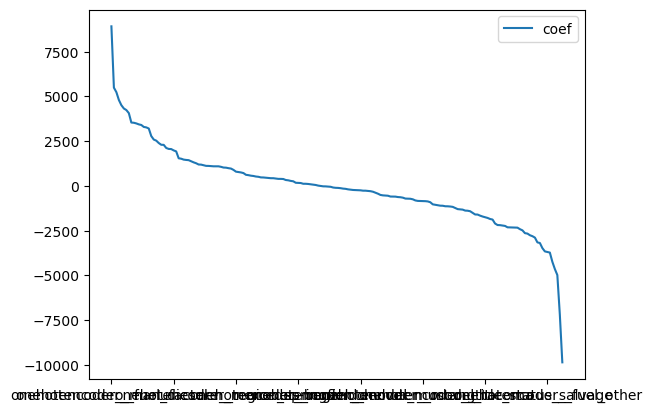

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [102]:
BEST_COEF_DF[BEST_COEF_DF['coef'] > 1000]

,coef
onehotencoder__fuel_diesel,8917.092924
onehotencoder__model_4runner,5492.271804
onehotencoder__model_corvette,5236.954517
onehotencoder__model_wrangler,4800.723762
onehotencoder__model_econoline cargo van,4511.173931
onehotencoder__model_tahoe,4326.624407
onehotencoder__title_status_lien,4239.799328
onehotencoder__model_super duty f-450 drw,4067.994439
onehotencoder__model_suburban,3542.508772
onehotencoder__manufacturer_lexus,3530.214173


# CONCLUSION OR FINDINGS:

Based on the results from regression model, it's evident that in terms of fuel, it's diesel vehicle which has more price for sale. Among different model of cars, following model of cars would have More price ---- 4runner, corvette, wrangler, enconoline cargo van, tahoe, super duty f-450 drw, suburban, super duty f-250 srw.